In [1]:
import pandas as pd #for dealing with dataframes
from sklearn.linear_model import LinearRegression #to deal with Linear Regression Models
from sklearn.model_selection import train_test_split #to be able to split datasets
from sklearn.metrics import mean_squared_error #to be able to calculate model's mean squared error
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_0=pd.read_csv('/datasets/geo_data_0.csv')
data_1=pd.read_csv('/datasets/geo_data_1.csv')
data_2=pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
def lr_model(f_train, f_valid, t_train, t_valid):
    lr = LinearRegression().fit(f_train, t_train)
    t_pred = lr.predict(f_valid)  
    rmse=(mean_squared_error(t_valid, t_pred))**0.5
    return rmse, t_pred

In [10]:
features0=data_0.drop(['id', 'product'], axis=1)
target0=data_0['product']
f_train0, f_valid0, t_train0, t_valid0 = train_test_split(features0, target0, test_size=0.25, \
                                                          random_state=12345)
rmse0, pred0 = lr_model(f_train0, f_valid0, t_train0, t_valid0)
print('RMSE:', rmse0, '; Average predicted volume:', pred0.mean())

RMSE: 37.5794217150813 ; Average predicted volume: 92.59256778438038


In [11]:
features1=data_1.drop(['id', 'product'], axis=1)
target1=data_1['product']
f_train1, f_valid1, t_train1, t_valid1 = train_test_split(features1, target1, test_size=0.25, \
                                                          random_state=12345)
rmse1, pred1 = lr_model(f_train1, f_valid1, t_train1, t_valid1)
print('RMSE:', rmse1, '; Average predicted volume:', pred1.mean())

RMSE: 0.893099286775616 ; Average predicted volume: 68.728546895446


In [12]:
features2=data_2.drop(['id', 'product'], axis=1)
target2=data_2['product']
f_train2, f_valid2, t_train2, t_valid2 = train_test_split(features2, target2, test_size=0.25, \
                                                          random_state=12345)
rmse2, pred2 = lr_model(f_train2, f_valid2, t_train2, t_valid2)
print('RMSE:', rmse2, '; Average predicted volume:', pred2.mean())

RMSE: 40.02970873393434 ; Average predicted volume: 94.96504596800489


In [13]:
points = 500
points_needed = 200
budget_200 = 100_000_000
income_per_volume = 4500
max_risk = 0.025
unit_of_volume = 1000
no_loss_volume=(budget_200/points_needed) / income_per_volume
print(no_loss_volume)

111.11111111111111


In [14]:
pred0 = pd.Series(pred0)
pred1 = pd.Series(pred1)
pred2 = pd.Series(pred2)
data_0['pred'] = pred0
data_1['pred'] = pred1
data_2['pred'] = pred2

In [17]:
def revenue(target, predicted, n):
    indices = predicted.sort_values(ascending=False).index
    return (target.loc[indices][:n].sum() * income_per_volume) - budget_200

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
No handles with labels found to put in legend.


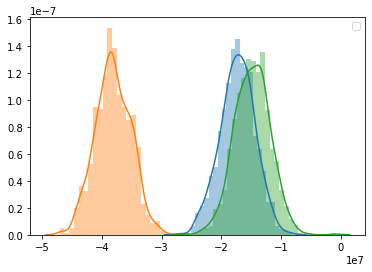

In [19]:
state = np.random.RandomState(12345)
def rev_bootstr(target, predictions):
    values = []
    target = pd.Series(target)
    predictions = pd.Series(predictions)
    for i in range(1000):
        target_sample = target.sample(n=points, replace=True, random_state=state)
        pred_sample=predictions.loc[target_sample.index]
        values.append(revenue(target_sample, pred_sample, points_needed))
    return pd.Series(values)

revenues0 = rev_bootstr(t_valid0, pred0)
revenues1 = rev_bootstr(t_valid1, pred1)
revenues2 = rev_bootstr(t_valid2, pred2)

sns.distplot(revenues0)
sns.distplot(revenues1)
sns.distplot(revenues2)
plt.legend()

In [23]:
len(revenues1[revenues1<0])/len(revenues1)

1.0